# Model zoo of machine learning 

----

### It's not just neural networks!

Until now, you have learnt about the elements of neural networks. While neural networks are the focus of this course, they are just one of the tools (surely the most exciting one recently) in machine learning. So before you go deeper in deep neural networks, we want to introduce other models too. 

Neural networks ( too often referred to as 'AI' nowadays ) are **NOT** always the best tool to solve a problem! Therefore we really want to avoid the situation that we give you a (truly powerful) hammer, and everything seems to look like a nail! Some datasets are not like nails, and require different solutions.

Please always taylor your models to the data, not the 'AI' hype.



### Neural networks vs other models

Neural networks became immensely popular in the last years, because they perform superbly in the following tasks: computer vision (image recognition/detection/segmentation), natural language processing ( speech recognition, language understanding, etc) and some Google products: game of Go, translation.

But they are usually inferior (or not clearly superior) to other solutions in many many problems:
* predicting customer behavior based on the company databases: who is unsatisfied and will leave the company, which product should you recommend in a webshop, etc
* predicting failed parts in manufacturing based on data measured on the assembly line
* predicting stock prices
* [playing poker better than humans](https://www.cmu.edu/news/stories/archives/2017/january/AI-beats-poker-pros.html)
* etc ( look at kaggle compeitions when the data is not image or sound, all those problems are usually best solved with **not** neural nets)


So when should you use neural networks? Oversimplified answer: (and slightly wrong): deep learning for computer vision and natural language processing, probably not deep learning for other datasets.

Deeper:
* Non neural network models use the input data as it is, and try to guess the output based on the intuition that what is close in X, shall be close in Y.
* The layers of neural networks (helped by the humans behind them) are basically learning better and better ( gradually lower dimensional and more correlated with output ) representations of the input data.

The distinction then will be:
* If the data has a nice and meaningful, unstructured, low dimensional representation then neural networks are probably not the best solution.
* If the data has some strong structure (image,voice), it is high dimensional (1MP image has 1 million dimensions!), and it does not have a meaningful low dimensinal representation, neural networks will probably work better than other solutions.



### Other models used here:

- K Nearest Neighbors
- Decision trees (random forests)
- Support vector machines
- There are many more useful models. The purpose of this notebook is to open the window.




## Some additional thoughts:

----

### Traditional machine learning models are easier to track than deep learning.


- Deep learning advances super fast, best solutions are usually 0-2 years old models. 
- The other models shown here are mostly decades old, and still relevant today (like quantum mechanics :) )
- You are mostly expected to use them, and not improve them. Tweak the parameters but rarely tweak the mechanism. Deep Learning models often require deeper knowledge of the model, and more radical modifications.
- Therefore we will only give a brief overview about how ther work, unlike the detailed overview of the elements of neural networks in the last weeks.



### Superhuman performances / Artificial Intelligence

You can read way too often that "AI" does this or that as well or better than humans. It is important to put these results into some context.


#### Hard problems for humans, easier for machines 

Traditional machine learning solves problems which are hard for humans. ( **Similarly to calculators ** ). Doing so they almost always reach "superhuman" performance. Personally i think it's not very lucky to call that Artifical Intelligence because it is a statsitical modelling which has not much to do with what "Natural Intelligence" does.


#### Easy problems for humans, harder for machines  

Deep Learning usually tries to solve a special subset of 'hard' problems, which humans are able to solve easily, but computers were unable to do it for decades. So it is more reasonable to call these systems Aritifical Intelligence.

But still, theese problems are just a well defined subset of tasks humans are able to do:

* Visual and audio perception, (translation, text understanding): "Artificial Perception", you are not "intelligent" if you can recognize a dog, right? They don't show dogs on IQ tests. 

(More generally deep learning can do things which you can do instinctively, without complex reasoning, in a split second.)

---

##### Games  

A special problems are **games**, which humans do not solve instinctively:

Go, this is considered to require intelligence from a human, so is AlphaGo really intelligent? Or is it more like a calucator? Do you think you are intelligent because you can integrate? Mathematica does it better, is it AI?

A calculator is clearly not intelligent, Mathematica neither, AlphaGo? ( Because AlphaGo uses neural nets it make it more "intelligent"? Stockfish is not considered intelligent, but it is *almost* (?) as good in chess.

Board games have a limited world (chess 64 positions) with few rules, and good mechanistic base for the solution (tree search, heuristics (e.g.: with neural net), mcmc tree search). And it can be **simulated**. 


##### A fully functional agent in the real world

The full world need fairly larger representation, has much wider possible steps, and it can not really be simulated. ( Except if we are living in a simulation right? )


An article realted to this topic: https://www.quantamagazine.org/why-self-taught-artificial-intelligence-has-trouble-with-the-real-world-20180221/

----

This notebook was created by Dezso Ribli, if you have any remarks or questions, please contact me.

---

In [1]:
%pylab inline  
# This 'magic' imports useful general stuff ignore it now

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd  # data handling toolbox

---

### [Scikit learn](http://scikit-learn.org/stable/index.html): the python machine learning toolbox

This the essential python library for machine learning. It contains models, metrics, and various helper functions, which make life so much easier. 



Load some models. See more [models and their details here](http://scikit-learn.org/stable/supervised_learning.html).

In [3]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network

Load a cross validation wrapper

In [4]:
from sklearn.model_selection import cross_val_score

Let's wrap the wrapper. 

In [5]:
def testClass(model,x,y):
    """Test a model."""
    # get CV scores
    acc = cross_val_score(model, x, y, cv=5)
    # eval them
    print 'Accuracy: %.2f +/- %.2f' % (100*mean(acc),100*std(acc))


---

### A classification dataset: finding the Higgs boson



The task is to identify the Higgs boson in simulated events.
* Inputs are various physical properties of events. 
* The labels indicate wheter this event corresponds to the Higgs boson or not.


The dataset is hosted [here](http://opendata.cern.ch/record/328), and it was used in a [kaggle challenge](https://www.kaggle.com/c/Higgs-boson).

##### Lets load the data and have a look at it:

It has 800k rows (data points), and 32 columns (variables).

In [6]:
cls_data = pd.read_csv('higgs.csv.gz')  # load it
print cls_data.shape
cls_data.head()  # peek

(10000, 32)


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,0


 Create X,Y matrices.

In [7]:
x = cls_data.drop(['Label'],axis=1).values
y = cls_data.Label.values

### OK, lets try some models!

In [8]:
testClass(linear_model.LogisticRegression(), x, y)

Accuracy: 90.44 +/- 3.71


In [9]:
testClass(neural_network.MLPClassifier(), x, y)

Accuracy: 74.75 +/- 3.28


In [10]:
testClass(neighbors.KNeighborsClassifier(), x, y)

Accuracy: 77.04 +/- 0.90


In [11]:
testClass(tree.DecisionTreeClassifier(), x, y)

Accuracy: 100.00 +/- 0.00


In [12]:
testClass(ensemble.RandomForestClassifier(), x, y)

Accuracy: 100.00 +/- 0.00


In [13]:
testClass(svm.SVC(), x, y)

Accuracy: 66.27 +/- 0.03


----


## A regression dataset: age and DNA methylation

Interestingly there is no simple way to guess the age of a person. We are not trees, there are no rings inside us. This can lead to some [interesting situations](https://www.theguardian.com/world/2016/apr/21/canadian-high-school-basketball-star-jonathan-nicola-refugee).

There are various methods using bones (featured in CSI) or teeth, but here we will show another method, a simple and surprisingly accurate blood test.

The dataset consists of some 'epigenetic' markers on their DNA, called 'methylation'. Each variable represents a specific point in the genome, and their value corresponds to the level of 'methylation' of that position. Methylation is a simple chemical modification of the DNA naturally applied by all cells.

![src](http://helicase.pbworks.com/f/DNAmeth.jpg)

The task will be: Predict the age of people based on their 'methylation' values.


[Data source](https://www.ncbi.nlm.nih.gov/pubmed/23177740?dopt=Abstract)

##### Lets load the data and have a look at it:

It has 656 rows (data points/individuals), and 600 columns (variables).

In [14]:
reg_data = pd.read_csv('meta_small.csv.gz')
print reg_data.shape
reg_data.head()

(656, 6000)


,cg15903280,cg06931612,cg06091566,cg13856810,cg03269716,cg00328058,cg02494066,cg19945840,cg07181952,cg12407057,...,cg12760479,cg05246190,cg04485799,cg01321673,cg24228040,cg14457918,cg19214594,cg22416596,cg13092901,age
0,0.684724,0.563155,0.095991,0.680305,0.540084,0.597984,0.688217,0.444277,0.666499,0.618196,...,0.203122,0.167868,0.277622,0.335411,0.089313,0.042557,0.101340,0.598267,0.160862,67
1,0.517232,0.506408,0.100586,0.608048,0.490075,0.546038,0.677310,0.452810,0.604140,0.524437,...,0.210701,0.170298,0.321532,0.385738,0.097602,0.055499,0.106527,0.528350,0.103857,89
2,0.599632,0.583201,0.108200,0.654993,0.499657,0.593465,0.728634,0.448331,0.679618,0.563532,...,0.224165,0.174149,0.298361,0.389150,0.094574,0.052345,0.110643,0.629068,0.162350,66
3,0.558150,0.556847,0.119937,0.677207,0.507026,0.624041,0.710796,0.395542,0.683562,0.656782,...,0.213196,0.180396,0.281102,0.358684,0.103197,0.045500,0.120281,0.651358,0.083764,64
4,0.580601,0.566075,0.073077,0.715584,0.565557,0.625385,0.749879,0.414505,0.646094,0.568832,...,0.193233,0.169397,0.299378,0.393603,0.077079,0.057783,0.128077,0.644327,0.154921,62


Create X,Y matrices.

In [15]:
x = reg_data.drop(['age'],axis=1).values
y = reg_data.age.values

----

Let's load a different wrapper this time, which gives us back the individual predictions, not just scores. This way we score the models ourselves the way we like it, and we can plot results.

In [16]:
from sklearn.model_selection import cross_val_predict

Wrap it!

In [17]:
def testReg(model, x, y):
    """Test a model."""
    y_pred = cross_val_predict(model, x, y, cv=5)  
        
    plot(y,y_pred,'.')  # plot data points
    plot([15,90],[15,90])  # y = x line for reference
    xlabel('age')  # label, labels, labels
    ylabel('predicted age') # and labels

    print 'RMSE:',((y-y_pred)**2).mean()**0.5  # primary metric
    print 'Pearson corr:',np.corrcoef(y,y_pred)[0,1]  # another one

### Let's model!

RMSE: 4.65605504438
Pearson corr: 0.949431477328


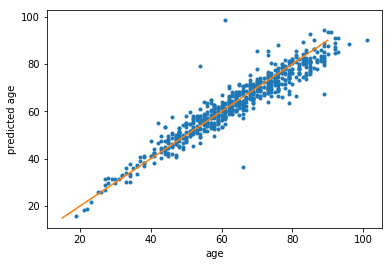

In [18]:
testReg(linear_model.LinearRegression(), x, y)

RMSE: 19.9838209033
Pearson corr: -0.253075702303


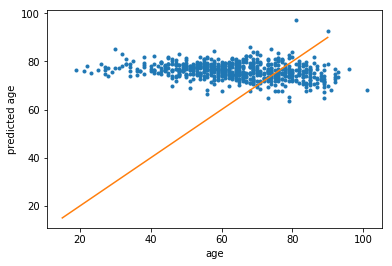

In [19]:
testReg(neural_network.MLPRegressor(), x, y)

RMSE: 8.60955580849
Pearson corr: 0.829862663754


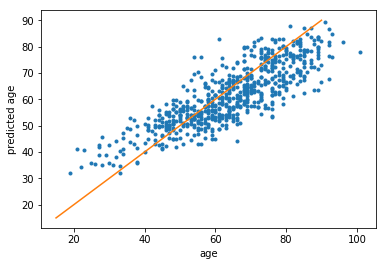

In [20]:
testReg(neighbors.KNeighborsRegressor(), x, y)

RMSE: 9.69653885949
Pearson corr: 0.778799946172


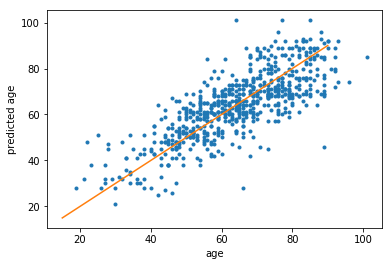

In [21]:
testReg(tree.DecisionTreeRegressor(), x, y)

RMSE: 6.9197215068
Pearson corr: 0.882872035935


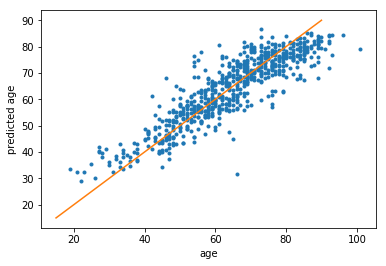

In [22]:
testReg(ensemble.RandomForestRegressor(n_jobs=-1), x, y)

RMSE: 15.1130636674
Pearson corr: -0.172118798877


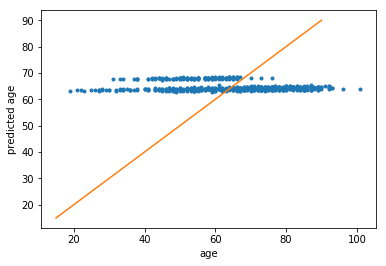

In [23]:
testReg(svm.SVR(), x, y)  # just doesnt work ...

RMSE: 5.00954574042
Pearson corr: 0.941455019821


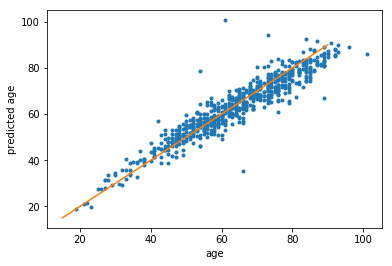

In [24]:
testReg(svm.SVR(C=1000.), x, y)  
# in order to make it work we just force it be linear
# but now it's pointless of course.

----


# Messages:


* Scikit-learn is your best friend.
* There is no single best model. Different models work well in different problems. (Even SVM can be excellent ;) )

* The model's have settings!

You have to develop an intuition in order to avoid extensive model/hyperparameter search!

---

# More

* There are [plenty of other models too in sklearn](http://scikit-learn.org/stable/supervised_learning.html)
* There are lot of models outside sklearn. Most notably:
    * Gradient Boosted Trees, and an implementation called [XGBoost](http://xgboost.readthedocs.io/en/latest/)
    * Neural networks (and an army of frameworks, but for beginners: [Keras](https://keras.io)